In [11]:
#pip install zstd
#pip install gpyopt

SyntaxError: invalid syntax (55905911.py, line 1)

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qchem
from GPyOpt.methods import BayesianOptimization

In [2]:
H2_data = qml.data.load("qchem", molname="H2", basis="STO-3G", bondlength=1.1)[0]
hamiltonian = H2_data.hamiltonian
print(hamiltonian)

  (-0.3796867241618816) [I0]
+ (-0.10485523662149618) [Z2]
+ (-0.10485523662149615) [Z3]
+ (0.1265398827193729) [Z0]
+ (0.1265398827193729) [Z1]
+ (0.10102818539518765) [Z0 Z2]
+ (0.10102818539518765) [Z1 Z3]
+ (0.15183377864956338) [Z0 Z3]
+ (0.15183377864956338) [Z1 Z2]
+ (0.15229282586796247) [Z0 Z1]
+ (0.1593698831813122) [Z2 Z3]
+ (-0.05080559325437572) [Y0 Y1 X2 X3]
+ (-0.05080559325437572) [X0 X1 Y2 Y3]
+ (0.05080559325437572) [Y0 X1 X2 Y3]
+ (0.05080559325437572) [X0 Y1 Y2 X3]


In [3]:
hf = H2_data.hf_state
print(hf)

[1 1 0 0]


In [4]:
num_wires = 4
dev = qml.device("default.qubit", wires=num_wires)
@qml.qnode(dev)
def exp_energy(state):
    qml.BasisState(np.array(state), wires=range(num_wires))
    return qml.expval(hamiltonian)
print(exp_energy(hf))

-1.036538181883847


In [5]:
def ansatz(params):
    qml.BasisState(hf, wires=range(num_wires))
    qml.DoubleExcitation(params[0], wires=[0,1,2,3])
    qml.DoubleExcitation(params[1], wires=[0,1,2,3])

In [13]:
@qml.qnode(dev)
def cost_function(params):
    ansatz(params)
    return np.array([qml.expval(hamiltonian)])
print(cost_function([0.1,0.1]))

-1.0676872415352232


In [12]:
# domain = [{'name': 'var_1', 'type': 'continuous', 'domain':(0,1)}]
bounds = [{'name': 'param1', 'type': 'continuous', 'domain': (-1, 1)},
          {'name': 'param2', 'type': 'continuous', 'domain': (-1, 1)}]
#bounds = [{'name': 'param1', 'type': 'continuous', 'domain': (0, 4*np.pi)},
#          {'name': 'param2', 'type': 'continuous', 'domain': (0, 4*np.pi)}]
opt = BayesianOptimization(f=cost_function, domain=bounds)
opt.run_optimization(max_iter=10)
best_params = opt.x_opt
best_cost = opt.fx_opt
print(best_params)
print(best_cost)
# myBopt = BayesianOptimization(f=cost_function([0.1,0.1]), domain=bounds)
# myBopt.run_optimization(max_iter=20)
# myBopt.plotacquisition()

IndexError: index 1 is out of bounds for axis 0 with size 1

TypeError: _process_unit_info() got an unexpected keyword argument 'xdata'

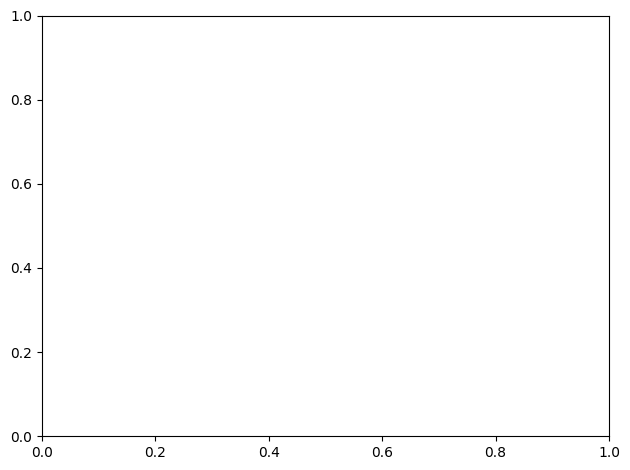

In [8]:
# --- Load GPyOpt
from GPyOpt.methods import BayesianOptimization
import numpy as np

# --- Define your problem
def f(x): 
    return (6*x-2)**2*np.sin(12*x-4)
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,1)}]

# --- Solve your problem
myBopt = BayesianOptimization(f=f, domain=domain)
myBopt.run_optimization(max_iter=15)
myBopt.plot_acquisition()

In [9]:
pip install --upgrade GPy GPyOpt


[notice] A new release of pip is available: 23.0 -> 23.2
[notice] To update, run: /opt/conda/envs/pennylane/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.4 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0 -> 23.2
[notice] To update, run: /opt/conda/envs/pennylane/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
np.pi

3.141592653589793

In [11]:
pi

NameError: name 'pi' is not defined